In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the numpy arrays from the 1.0 Data Preprocessing

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#first CNN layer

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#second CNN layer

model.add(Flatten())
model.add(Dropout(0,5))
#flatten layer to stack output convolutions from the second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2, activation='softmax'))
#final layer with two output categories

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target= train_test_split(data, target, test_size=0.1)


In [9]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target, epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 63s 63ms/step - loss: 0.7533 - accuracy: 0.5495 - val_loss: 0.6297 - val_accuracy: 0.6976
Epoch 2/20
990/990 [==============================] - 61s 62ms/step - loss: 0.5360 - accuracy: 0.7212 - val_loss: 0.4425 - val_accuracy: 0.7944
Epoch 3/20
990/990 [==============================] - 59s 59ms/step - loss: 0.3566 - accuracy: 0.8465 - val_loss: 0.3426 - val_accuracy: 0.8710
Epoch 4/20
990/990 [==============================] - 56s 56ms/step - loss: 0.2552 - accuracy: 0.9040 - val_loss: 0.2798 - val_accuracy: 0.8992
Epoch 5/20
990/990 [==============================] - 61s 62ms/step - loss: 0.1789 - accuracy: 0.9374 - val_loss: 0.2452 - val_accuracy: 0.9234
Epoch 6/20
990/990 [==============================] - 58s 59ms/step - loss: 0.1241 - accuracy: 0.9545 - val_loss: 0.2130 - val_accuracy: 0.9315
Epoch 7/20
990/990 [==============================] - 59s 59ms/step - loss: 0.0959 - accur

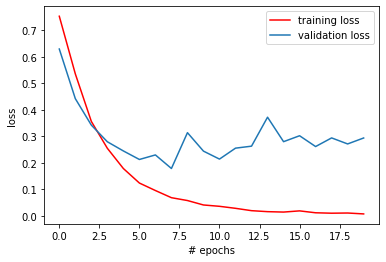

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



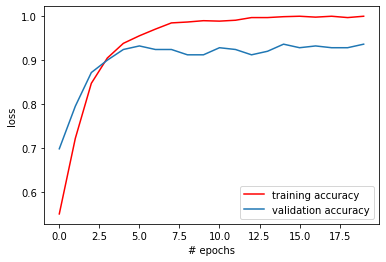

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data, test_target))


138/138 [==============================] - 2s 14ms/step
[0.09490397119003793, 0.97826087474823]
